In [115]:
import pandas as pd
import seaborn as sns
import numpy as np

In [116]:
applications = pd.read_excel('Big_Case_-_nubank_v2.1.xlsx', sheet_name='application_data')
performance = pd.read_excel('Big_Case_-_nubank_v2.1.xlsx', sheet_name='performance_data')
clients = pd.merge(applications, performance, on='id')
clients = clients.drop(columns=['first_name', 'middle_initial', 'last_name', 'address_city', 'phone', 'email', 'occupation', 'cpf'])

In [118]:
clients['monthly_income'] = np.log10(np.array(clients['monthly_income'] + 1))
clients['monthly_rent'] = np.log10(np.array(clients['monthly_rent'] + 1))
# clients['residence_rent_or_own'] = clients['residence_rent_or_own'].astype('int')
clients['fcf'] = clients['monthly_income']-clients['monthly_rent']
clients['app_req_ratio'] = clients['credit_line_requested']/clients['credit_line_approved']

In [119]:
geog = ['cep', 'longitude', 'latitude']
personal = ['birth_date', 'facebook_gender', 'facebook_profile_duration', 'home_phone_type',]
financial = ['monthly_income', 'monthly_rent', 'residence_rent_or_own', 'residence_duration', 'bank_account_duration', 'fcf']
credit_score = ['score_TU', 'score_FICO_money', 'score_lexisnexis', 'score_serasa', 'score_unit4', 'credit_line_requested', 'credit_line_approved','app_req_ratio']
y = ['defaulted', 'monthly_spend', 'customer_until']

In [120]:
#sns.pairplot(clients[geog + ['defaulted']], hue='defaulted')

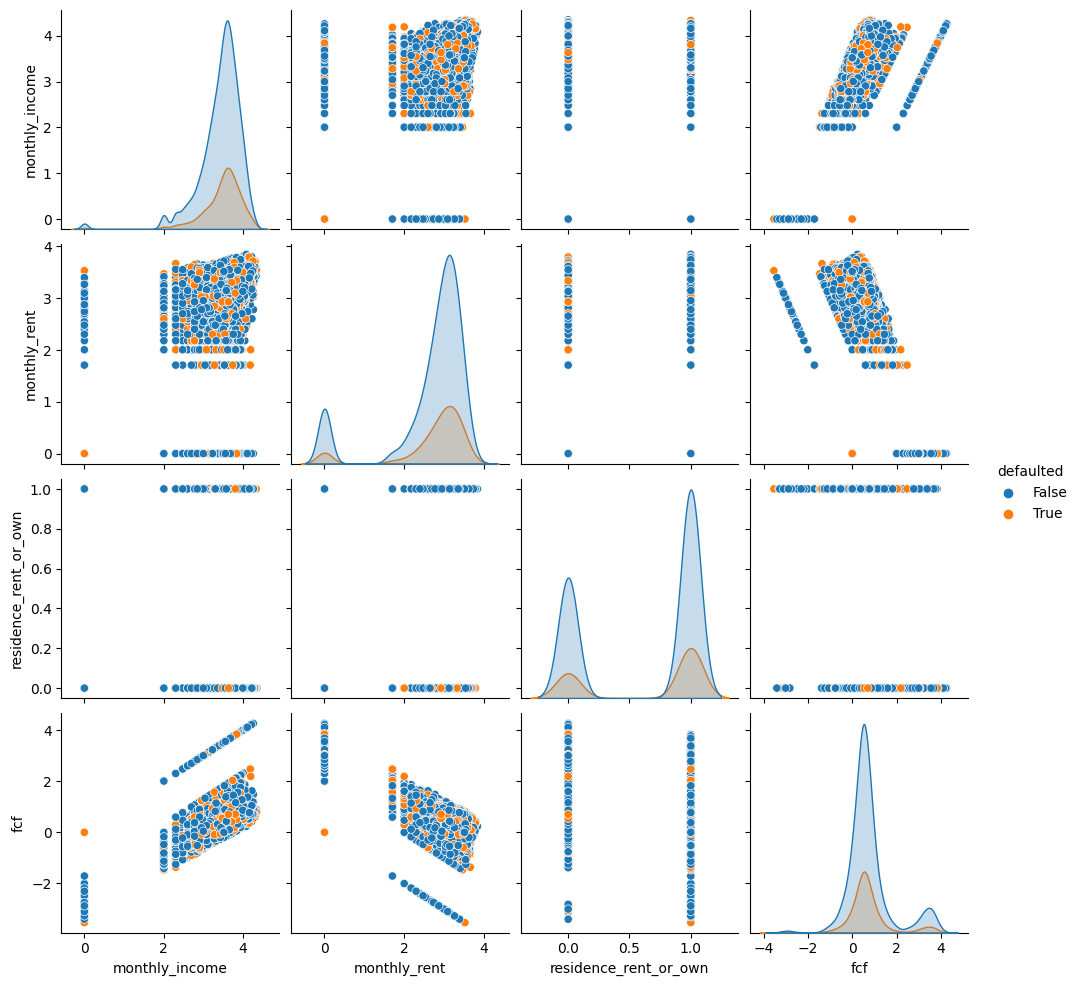

In [121]:
sns.pairplot(clients[financial + ['defaulted']], hue='defaulted')

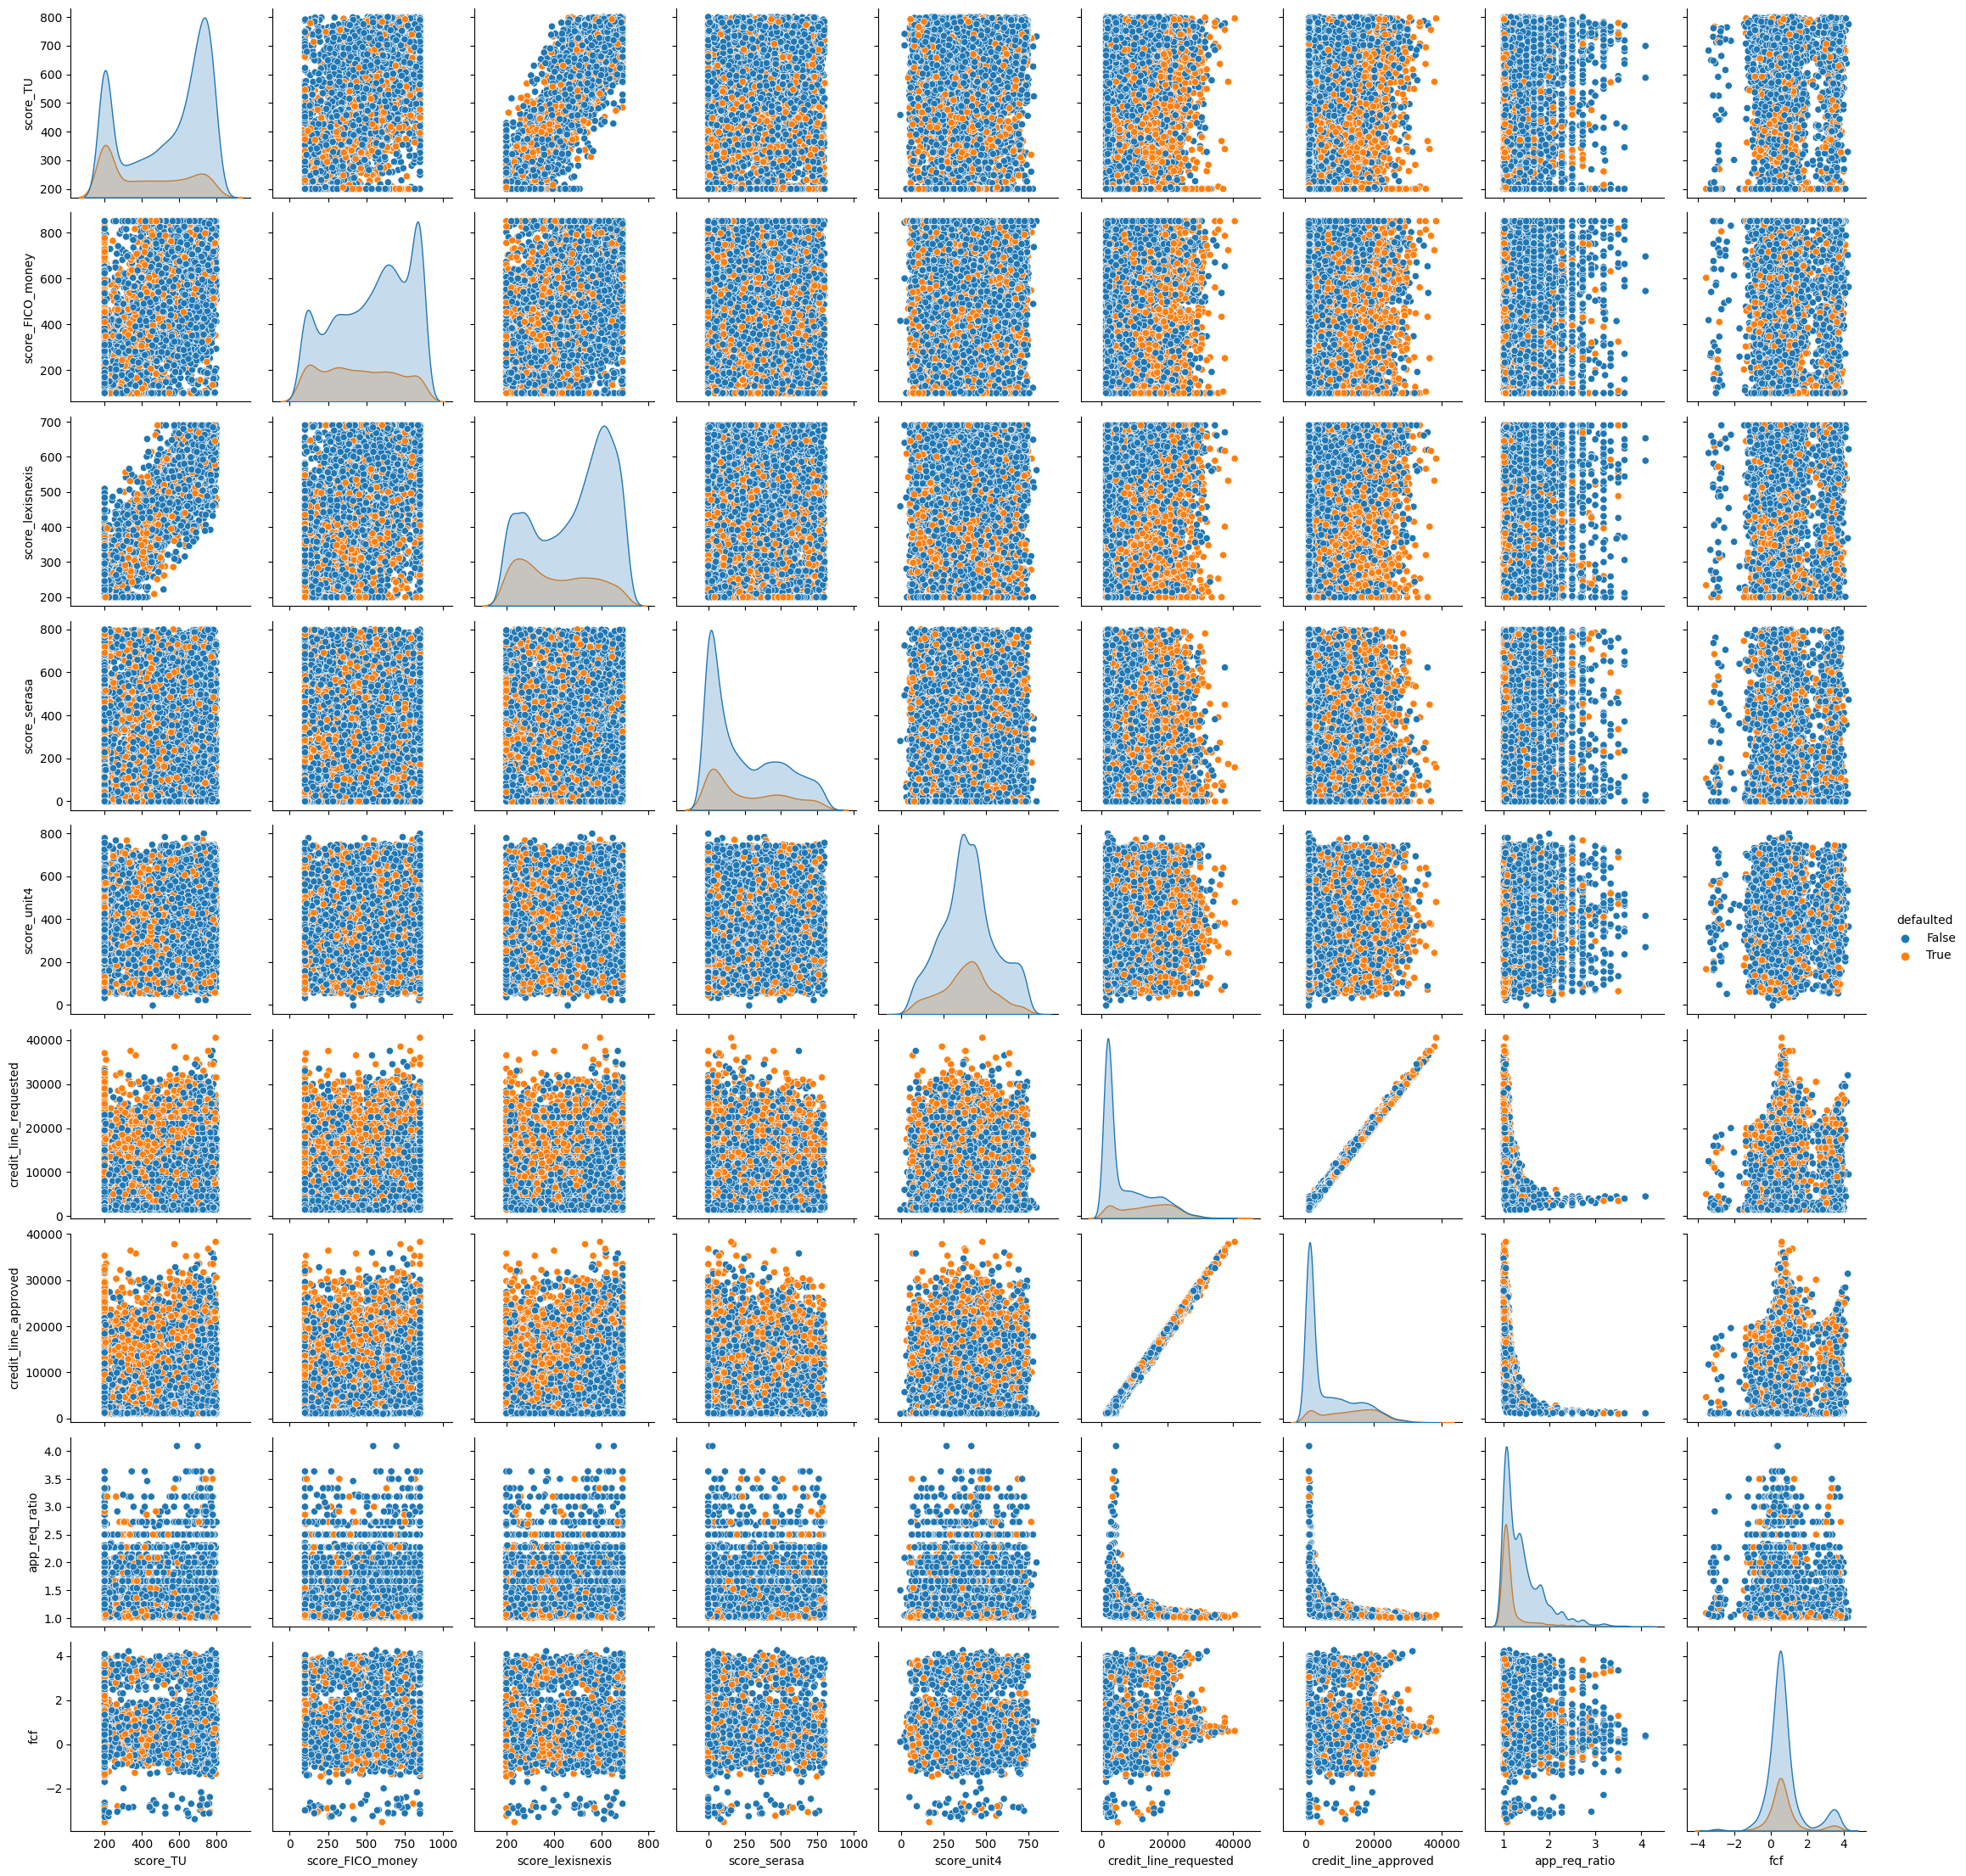

In [122]:
sns.pairplot(clients[credit_score + ['defaulted', 'fcf']], hue='defaulted')

In [128]:
clients[credit_score+y].corr()

score_TU  score_FICO_money  score_lexisnexis   
score_TU               1.000000          0.747811          0.932542  \
score_FICO_money       0.747811          1.000000          0.700256   
score_lexisnexis       0.932542          0.700256          1.000000   
score_serasa          -0.084097         -0.049336         -0.075746   
score_unit4            0.154762          0.112231          0.143544   
credit_line_requested  0.031691          0.021303          0.031112   
credit_line_approved   0.033544          0.022776          0.032756   
app_req_ratio         -0.031010         -0.021727         -0.032365   
defaulted             -0.218445         -0.149719         -0.206792   
monthly_spend          0.052502          0.050231          0.047005   
customer_until        -0.173322         -0.116097         -0.166615   

                       score_serasa  score_unit4  credit_line_requested   
score_TU                  -0.084097     0.154762               0.031691  \
score_FICO_money          -0.049336     0.112231               0.021303   
score_lexisnexis          -0.075746     0.143544               0.031112   
score_serasa               1.000000    -0.022488              -0.009354   
score_unit4               -0.022488     1.000000               0.001749   
credit_line_requested     -0.009354     0.001749               1.000000   
credit_line_approved      -0.010296     0.002498               0.997856   
app_req_ratio              0.014334    -0.001136              -0.560200   
defaulted                  0.030814    -0.029935               0.355167   
monthly_spend             -0.008487     0.007192               0.099120   
customer_until             0.018335    -0.023220               0.161382   

                       credit_line_approved  app_req_ratio  defaulted   
score_TU                           0.033544      -0.031010  -0.218445  \
score_FICO_money                   0.022776      -0.021727  -0.149719   
score_lexisnexis                   0.032756      -0.032365  -0.206792   
score_serasa                      -0.010296       0.014334   0.030814   
score_unit4                        0.002498      -0.001136  -0.029935   
credit_line_requested              0.997856      -0.560200   0.355167   
credit_line_approved               1.000000      -0.596204   0.354266   
app_req_ratio                     -0.596204       1.000000  -0.216585   
defaulted                          0.354266      -0.216585   1.000000   
monthly_spend                      0.098157      -0.042252   0.016651   
customer_until                     0.161497      -0.083790   0.758931   

                       monthly_spend  customer_until  
score_TU                    0.052502       -0.173322  
score_FICO_money            0.050231       -0.116097  
score_lexisnexis            0.047005       -0.166615  
score_serasa               -0.008487        0.018335  
score_unit4                 0.007192       -0.023220  
credit_line_requested       0.099120        0.161382  
credit_line_approved        0.098157        0.161497  
app_req_ratio              -0.042252       -0.083790  
defaulted                   0.016651        0.758931  
monthly_spend               1.000000        0.017024  
customer_until              0.017024        1.000000